In [51]:
# Group members #

# Fitsum Endashaw, and Dawit Hailu

from bs4 import BeautifulSoup
import requests
import requests.exceptions
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from datetime import datetime
import time

In [52]:
# Part 1

##
#First, retrieved the data from the provided 
#URL:SpaceWeatherLive.com(https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares).
#Steps I took:
#Used Beautiful Soup to read and parse the data
#Used find() and find_all to save the aforementioned table as a variable
#Used pandas to read in the HTML file.  HINT make-sure the above data is properly typecast.
#And Used reasonable names for the table columns
##

## Step 1

# retrieving the html from the url 
url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'

response = requests.get(url)
soup=BeautifulSoup(response.content)

In [53]:
data=list()
for tr in soup.find('table',{'class':'table table-striped table-responsive-md'}).find('tbody').find_all('tr'):
    d=list()
    for td in tr.find_all('td'):
        d.append(td.get_text().strip())
    data.append(d)
    
for d in data:       # Converting to datetime
    d[4]=datetime.strptime(d[2]+' '+d[4], '%Y/%m/%d %H:%M')  
    d[5]=datetime.strptime(d[2]+' '+d[5], '%Y/%m/%d %H:%M')
    d[6]=datetime.strptime(d[2]+' '+d[6], '%Y/%m/%d %H:%M')    



for d in data:    #  moving region column at the end
    d.append(d[3])
    del d[3]

In [54]:
# Creating dataframe
df=pd.DataFrame(data,columns=['Rank','x_class','date','start_datetime','max_datetime','end_datetime','movie','region'])
print (df)

   Rank x_class        date      start_datetime        max_datetime  \
0     1   X28.0  2003/11/04 2003-11-04 19:29:00 2003-11-04 19:53:00   
1     2   X20.0  2001/04/02 2001-04-02 21:32:00 2001-04-02 21:51:00   
2     3   X17.2  2003/10/28 2003-10-28 09:51:00 2003-10-28 11:10:00   
3     4   X17.0  2005/09/07 2005-09-07 17:17:00 2005-09-07 17:40:00   
4     5   X14.4  2001/04/15 2001-04-15 13:19:00 2001-04-15 13:50:00   
5     6   X10.0  2003/10/29 2003-10-29 20:37:00 2003-10-29 20:49:00   
6     7    X9.4  1997/11/06 1997-11-06 11:49:00 1997-11-06 11:55:00   
7     8    X9.3  2017/09/06 2017-09-06 11:53:00 2017-09-06 12:02:00   
8     9    X9.0  2006/12/05 2006-12-05 10:18:00 2006-12-05 10:35:00   
9    10    X8.3  2003/11/02 2003-11-02 17:03:00 2003-11-02 17:25:00   
10   11    X8.2  2017/09/10 2017-09-10 15:35:00 2017-09-10 16:06:00   
11   12    X7.1  2005/01/20 2005-01-20 06:36:00 2005-01-20 07:01:00   
12   13    X6.9  2011/08/09 2011-08-09 07:48:00 2011-08-09 08:05:00   
13   1

In [55]:
# Second, dropped the unnecessary columns date and movie  
### Step 2
df.drop(columns=['movie','date'])  # dropping unecessary columns


,Rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


In [56]:
# Step 3

# Used BeautifulSoup functions and string functions to obtain each row of data. 
# Used  appropriate names for columns.
# Created a DataFrame.


#   retrieving the html from the url 
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'

response = requests.get(url)
soup=BeautifulSoup(response.content)

In [57]:
# Creating list of lists
data1=list()
text=soup.find('pre').get_text()
for t in (text.split('\n')[11:]):
    d1=list()
    for tt in t.split(' '):
        if len(d1)<14:
            if tt:
                d1.append(tt)
    if len(d1)==14:
        data1.append(d1)
    del d1
        

In [58]:
#### Step 4
# Data parsing
lowerbound=300
for d1 in data1:
    try:
        d1[2]=datetime.strptime(str(d1[0][:5])+str(d1[2])+' '+str(d1[3]), '%Y/%m/%d %H:%M')  ## Date time conversion Using year from column 1
    except:
        d1[2]=(str(d1[0][:5])+str(d1[2])+' '+str(d1[3]+':00')).replace('/','-')   ## Handling exceptions
        
    try:
        d1[9]=datetime.strptime(str(d1[0][:5])+str(d1[9])+' '+str(d1[10]), '%Y/%m/%d %H:%M')  
    except:
        d1[9]=(str(d1[0][:5])+str(d1[9])+' '+str(d1[10]+':00')).replace('/','-')
        
    d1[0]=datetime.strptime(str(d1[0])+' '+str(d1[1]), '%Y/%m/%d %H:%M')
    
    if d1[-3]=="Halo":                 # adding plot_is_halo column
        d1.append('True')
        d1[-4]='NA'
    else:
        d1.append('False')
        
    d1[-3].replace('>','').replace('<','')
    try:
        if int(d1[-3])<lowerbound:    # calculating lower bound
            lowerbound=int(d1[-3])
    except:
        temp='none'
    
    
print ('Lowerbound of width is :'+str(lowerbound))

for d1 in data1:
    try:
        if int(d1[-3])==lowerbound:
            d1.append('True')        # Adding lower_bound column
        else:
            d1.append('False')
    except:
        d1.append('False')

Lowerbound of width is :19


In [59]:
# Creating dataframe
df1=pd.DataFrame(data1,columns=['start_datetime','start_time','end_datetime','end_time','start_frequency','end_frequency','flare_location','flare_region','flare_classification <chr>','cme_datetime','cme_time', 'cpa', 'cme_width', 'cme_speed','Plot is_halo','width_lower_bound'])
print (df1)

         start_datetime start_time         end_datetime end_time  \
0   1997-04-01 14:00:00      14:00  1997-04-01 14:15:00    14:15   
1   1997-04-07 14:30:00      14:30  1997-04-07 17:30:00    17:30   
2   1997-05-12 05:15:00      05:15  1997-05-14 16:00:00    16:00   
3   1997-05-21 20:20:00      20:20  1997-05-21 22:00:00    22:00   
4   1997-09-23 21:53:00      21:53  1997-09-23 22:16:00    22:16   
5   1997-11-03 05:15:00      05:15  1997-11-03 12:00:00    12:00   
6   1997-11-03 10:30:00      10:30  1997-11-03 11:30:00    11:30   
7   1997-11-04 06:00:00      06:00  1997-11-05 04:30:00    04:30   
8   1997-11-06 12:20:00      12:20  1997-11-07 08:30:00    08:30   
9   1997-11-27 13:30:00      13:30  1997-11-27 14:00:00    14:00   
10  1997-12-12 22:45:00      22:45  1997-12-12 23:20:00    23:20   
11  1998-01-25 15:03:00      15:03  1998-01-25 15:18:00    15:18   
12  1998-03-29 03:40:00      03:40  1998-03-29 03:52:00    03:52   
13  1998-04-20 10:25:00      10:25  1998-04-22 0

In [60]:
df1.drop(columns=['start_time','end_time','cme_time'])  # dropping unecessary columns


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification <chr>,cme_datetime,cpa,cme_width,cme_speed,Plot is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


In [61]:
# Part 2: Analysis

## classifying the NASA data on the basis of x_class

In [62]:
# Question 1: Replication
classes=list(df1['flare_classification <chr>'])   # creating new list of classifcication column from the NASA data

for x in range(len(classes)):
    try:
        if (int(classes[x].split('.')[0][1:]))>9:   # Making amends to the data
            classes[x]=classes[x]+'0'
    except:
        ewein='none'  

In [63]:
temp=list()
for x in classes:
    try:
        if 'X' in x:
            temp.append(float(x[1:]))  # Constracting a list of float values belonging to x_class
    except:
        ewein='none'
temp=sorted(temp)
temp=list(reversed(temp))        
temp=temp[:50]
  

In [64]:
indices=list()
for t in temp:
    for x in range(len(classes)):
        # retrieving indices from the dataframe according to their x_xlass, starting from highest to lowest. 
        if str(t) in classes[x] and 'X' in classes[x]:  
            indices.append(x)
            break
    

In [65]:
data2=list()
for i in indices:               # retrieving rows from the dataframe
    data2.append(df1.iloc[i])

In [66]:
df2=pd.DataFrame(data2)  # finally, Creating the dataframe
print (df2)

         start_datetime start_time         end_datetime end_time  \
242 2003-11-04 20:00:00      20:00  2003-11-04 24:00:00    24:00   
119 2001-04-02 22:05:00      22:05  2001-04-03 02:30:00    02:30   
234 2003-10-28 11:10:00      11:10  2003-10-29 24:00:00    24:00   
128 2001-04-15 14:05:00      14:05  2001-04-16 13:00:00    13:00   
235 2003-10-29 20:55:00      20:55  2003-10-29 24:00:00    24:00   
8   1997-11-06 12:20:00      12:20  1997-11-07 08:30:00    08:30   
330 2006-12-05 10:50:00      10:50  2006-12-05 20:00:00    20:00   
238 2003-11-02 17:30:00      17:30  2003-11-03 01:00:00    01:00   
290 2005-01-20 07:15:00      07:15  2005-01-20 16:30:00    16:30   
360 2011-08-09 08:20:00      08:20  2011-08-09 08:35:00    08:35   
333 2006-12-06 19:00:00      19:00  2006-12-08 24:00:00    24:00   
319 2005-09-09 19:45:00      19:45  2005-09-09 22:00:00    22:00   
83  2000-07-14 10:30:00      10:30  2000-07-15 14:30:00    14:30   
123 2001-04-06 19:35:00      19:35  2001-04-07 0

In [67]:
# Question 2:Integration
# matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data.
# Tried getting the best matching rows against the space weather data,
# got the differences but realized that the space weather data only classifies by x_class
# the df2 dataframe actually are the best macthing rows
differences=list()

for x in range(len(df['x_class'])):
    diff=20.0
    temp1=float(df['x_class'][x][1:])
    for y in range(len(df1['flare_classification <chr>'])):
        try:
            d=(temp1-float((df1['flare_classification <chr>'])[y][1:]))
            if d<0:
                d=d*(-1)
            if d<diff:
                diff=d
        except:
            eweim='none'
    
    differences.append(diff)
    
    

(array([ 729390.,  730851.,  732312.,  733773.,  735234.]),
 <a list of 5 Text xticklabel objects>)

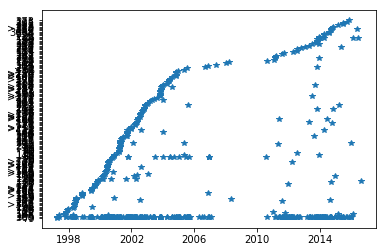

In [68]:
# Question 3 : Analysis 
# All NASA data scatter plot of width against starting time.
# By the concept of linear regression we can conclude that there is a postive coveriance relationship between the axis.   
dfnew = df1.sort_values('start_datetime', ascending=True)
plt.plot(dfnew['start_datetime'], dfnew['cme_width'],'*')
plt.xticks(rotation='horizontal')

(array([ 729755.,  730486.,  731216.,  731947.,  732677.,  733408.,
         734138.,  734869.]), <a list of 8 Text xticklabel objects>)

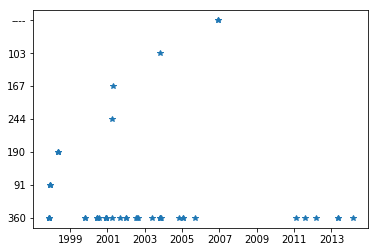

In [69]:
#First 50 flares NASA data scatter plot of width against starting time
dfnew = df2.sort_values('start_datetime', ascending=True)
plt.plot(dfnew['start_datetime'], dfnew['cme_width'],'*')
plt.xticks(rotation='horizontal')